<!-- $\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$
$\newcommand{\dvec}[1]{\begin{pmatrix}#1\end{pmatrix}}$ -->

# Classical Gates

In this notebook, we will define and explore the logic operations known as gates, that make up our classical computational world. 
> A logic gate is an idealized model of computation or physical electronic device implementing a Boolean function, a logical operation performed on one or more binary inputs that produces a single binary output.

We can define gates by their action on a given bit, using a `truth table`.

## 1-Bit gates

1.  `BUFFER` Gate
The `BUFFER` gate is simply the identity operation, and is defined with the following `truth table`:

|Input | Output |
|--- | --- |
|0  |  0 |
|1  |  1 |

2.  `NOT` Gate
The `NOT` gate is simply a gate which will flip the bit it acts on. 
Also known as an inverter, the `NOT` gate has the following `truth table`:

|Input | Output |
|--- | --- |
|0  |  1 |
|1  |  0 |

### Matrix representation
This is a 1-bit gate. Since the bit can be in 1 of 2 states, 
let's call the `off` state $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$, 
and the `on` state $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

Treating these states as vectors, we can find a matrix which implements the `X` gate:
$$\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
such that,
$$\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$
$$\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$



<!--We can implement this boolean operation using something known as "[modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic)". -->

### 2-Bit gates

These are classical gates that act on 2 bits at a time. Here are the truth tables:


|Input | `AND`| `OR` | `NAND` | `NOR` | `XOR` | `XNOR` |
|---   | ---  | ---  | ---    | ---   | ---   | ---    |
|00    |  0   |  0   |  1     |  1    |  0    |  1     |
|01    |  0   |  1   |  1     |  0    |  1    |  0     |
|10    |  0   |  1   |  1     |  0    |  1    |  0     |
|11    |  1   |  1   |  0     |  0    |  0    |  1     |

# `Quantum` Gates

## 1-qubit Gates

### Hadamard gate
Let's go back to the case where we had a single bit. 
Our `X_gate` was given as $\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$.
However, a quantum computer gives us access to new kinds of gates. 
There are many new quantum gates, but the first that is worth discussing is the 
`Hadamard` gate:
$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

Let's see what happens when this gate acts on a single bit of information:

In [21]:
import numpy as np
HGate = np.array([[1, 1],[1, -1]])/np.sqrt(2)
print(" Hadamard gate: ")
print(HGate)
print()

off = np.array([[1,0]]).T
on = np.array([[0,1]]).T

print(" |off> = ")
print(off)
print()
print(" |on> = ")
print(on)
print()

print("HGate applied to off state")
print(HGate.dot(off))
print()

print("HGate applied to on state")
print(HGate.dot(on))

 Hadamard gate: 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 |off> = 
[[1]
 [0]]

 |on> = 
[[0]
 [1]]

HGate applied to off state
[[0.70710678]
 [0.70710678]]

HGate applied to on state
[[ 0.70710678]
 [-0.70710678]]


As we see, this gate does something special, it creates a `superposition`!

$U^H\ket{0} = \frac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right) = \ket{+}$

$U^H\ket{1} = \frac{1}{\sqrt{2}}\left(\ket{0}-\ket{1}\right) = \ket{-}$


#### Rotation gates

Any qubit state $\ket{\psi}$ can be written as a linear combination of the `off` and `on` states, $\ket{0}$ and $\ket{1}$: 
$$
\ket{\psi} = c_0\ket{0} + c_1\ket{1}
$$
Initially, this might look like we have 2 variables, or 2 degrees of freedom such that the space of all possible qubit states is a 2-dimensional plane. 
However, this is not the case, because we require that states be normalized, such that 
$$|c_0|^2 + |c_1|^2 = 1.$$
This means that the 2 variables are not independent, but rather are related such that there is only a single degree of freedom, $\theta$:
$$
\ket{\psi} = \cos(\theta)\ket{0} + \sin(\theta)\ket{1},
$$
sweeping out the unit circle. 
However, because the wavefunction can also be complex (meaning that the coefficients can have an imaginary component)
we have 1 more degree of freedom, making this a 2-dimensional surface - the surface of a sphere. 
$$
\ket{\psi} = \cos(\theta/2)\ket{0} + e^{i\phi}\sin(\theta/2)\ket{1},
$$
where 
- $0\le \theta \le \pi$ 
- $0\le \phi \lt 2\pi$.

We call this sphere the `bloch sphere`. Let's use Qiskit to visualize this. 


In [22]:
# First import the packages we need

from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector

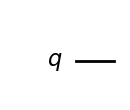

In [23]:
# Now lets start by creating a quantum circuit with only 1 qubit

circ = QuantumCircuit(1,0)
circ.draw(output = 'mpl')
# circ.draw(output = 'latex')

At this point, we haven't done anything interesting. Our qubit is in state $\ket{0}$, and we have

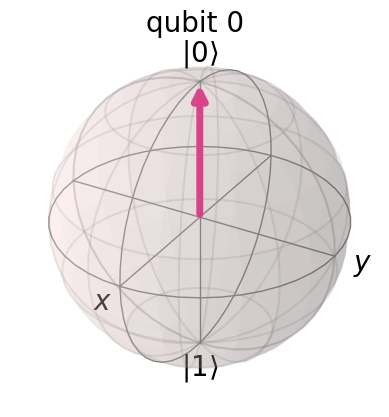

In [24]:
# Qiskit has a lot of options for simulating the wavefunction, but we will use the simplest right now
sim = Aer.get_backend('statevector_simulator')


result_sv1 = execute(circ, backend = sim).result()
state_vec1 = result_sv1.get_statevector()
plot_bloch_multivector(state_vec1)

Now let's apply a `Hadamard` gate to this qubit, and see what happens on our bloch sphere. 

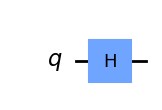

In [25]:
circ = QuantumCircuit(1,0)
circ.h(0)
circ.draw(output = 'mpl')

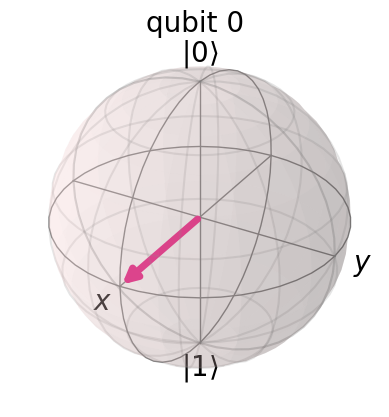

In [26]:
result_sv1 = execute(circ, backend = sim).result()
state_vec1 = result_sv1.get_statevector()
plot_bloch_multivector(state_vec1)

We said that the qubit state can be at any point on this sphere, as each point corresponds to a unique value for $\theta$ and $\phi$. In order to explore this space we need to have more gates available to us. 
What we see above, is that the Hadamard gate applied to the $\ket{0}$ state corresponds to a $\pi/2$ rotation in the $xz$ plane, in otherwords, a $\pi/2$ rotation about the $y$ axis.

We can equivalently produce the same state by doing another gate which explicitly rotates about the $y$ axis, the `RY(𝜋)` gate.

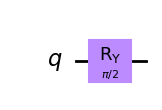

In [27]:
circ = QuantumCircuit(1,0)
circ.ry(np.pi/2,0)
circ.draw(output = 'mpl')

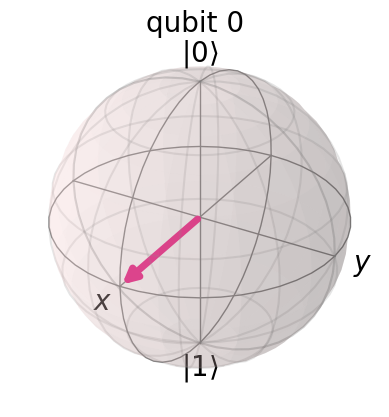

In [28]:
result_sv1 = execute(circ, backend = sim).result()
state_vec1 = result_sv1.get_statevector()
plot_bloch_multivector(state_vec1)

However, unlike the Hadamard gate which is _discrete_, meaning that it cannot rotate this vector by an arbitrary amount, the RY gate is _continous_ and can find any point on the circle in the $xz$ plane. 
We can similarly define rotations about the $x$ and $z$ axes as well, `RX` and `RZ` gates. 
Each of these can take on an arbitrary angle, and are written as exponentials of the corresponding Pauli operator:
- `RX`  $ = e^{-i\theta\sigma^x}$
- `RY`  $ = e^{-i\theta\sigma^y}$
- `RZ`  $ = e^{-i\theta\sigma^z}$

- Apply a few rotation gates and see what happens
- Notice that the order matters! 

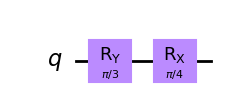

In [29]:
circ = QuantumCircuit(1,0)
circ.ry(np.pi/3,0)
circ.rx(np.pi/4,0)
circ.draw(output = 'mpl')


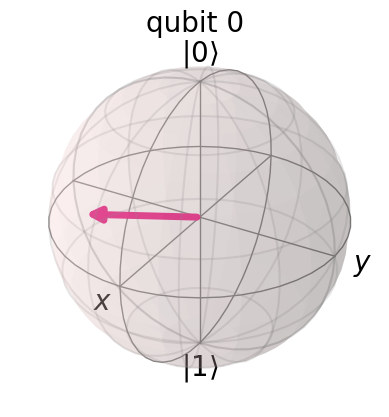

In [30]:
result_sv1 = execute(circ, backend = sim).result()
state_vec1 = result_sv1.get_statevector()
plot_bloch_multivector(state_vec1)